# The Boltzmann machine

## A short introduction

A Boltzmann machine is a _symmetric binary stochastic neural network_. This means that the nodes (also called neurons) of the network can only assume one of two possible states, namely 1 and 0 or, equivalently, "on" and "off" (__binary property__). At each iteration step, the state of such a neuron is switched on (or kept on) with a certain __probability p__ (__stochastic property__). Intuitively, a neuron should more likely to be active (i.e. in the "on" state) if it receives a lot of input. This is exactly what is the case in the Boltzmann machine, where the probability $p(s_i)$ that neuron $i$ is in state $s=1^{[1],[2]}$:

$$p(s_i=1) = \frac{1}{1+e^{-\frac{z_i}{T}}},$$

where

$$z_i = b_i + \sum_{j}^N s_j\omega_{ij}, \,\,\, \omega_{ii} = 0.$$

$z_i$ is the input that unit $i$ receives (where bias acts as input as well). Here, $s_j$ is the state of neuron $j$, $N$ is the number of neurons in the network, $b_i$ is the _bias_ of neuron $i$ and $\omega_{ij}$ is the connection strength from neuron $j$ to neuron $i$. Importantly connections are symmetric, i.e. $\omega_{ij}=\omega_{ji}$ (__symmetric property__). $T$ is the system temperature. It determines the slope of the sigmoid function $p(s_i = 1)$, which turns into the Heaviside stepfunction for $T \rightarrow 0$:

![Activation function of unit i](./sigmoid.png)

The state of the network is completely described by state vector $\vec{s}=(s_1, s_2, ..., s_n)^T$, $s_i\in{0,1}$.

Before coming to the eponymous feature of the Boltzmann machine, we first have to introduce the concept of the _energy_ of the network. Each state $\vec{s}$ is associated with a scalar function called the state's _energy_ E($\vec{s}$):

<div class="alert alert-block alert-success">
<b>Energy of a state $\vec{s}$</b>
$$E(\vec{s}) = -\sum_i s_i b_i - \sum_{i \lt j} s_is_j\omega_{ij}.$$
</div>
Here
$$\sum_{i \lt j} s_is_j\omega_{ij} \doteq  \sum_{i=1}^j \sum_{j=2}^N s_is_j\omega_{ij},$$

The energy of a state is thus __the negative sum of the biases of all active neurons minus the sum of connection weights of connections whose neurons on both ends are active__. 

<div class="alert alert-block alert-info">
<b>Some words about the energy function</b>

Why is $E(\vec{s})$ called the energy? It's called energy because it behaves like a physical energy: it's a scalar function whcih the system tends to minimize. How can we see that the energy is actually minimized by the system? To understand this, it is helpful to realise that the input $z_i$ to a neuron is is equal to the amount by which $E(\vec{s})$ is reduced, when unit $i$ turns from off to on:

$$E(s_i = 0)-E(s_i=1) = z_i.$$

Now consider the case $T\rightarrow 0$, for which the probability of a neuron being on turns into a step function (Fig. 1): If $z_i>0$ (which means that a switching on of the state would reduce the energy function), the state is set to "on" with 100% certainty. If $z_i<0$ (which means that a switching on of the state would increase the energy function), the state is set to "off" with certainty. If $T<<\infty$, then this behaviour is not deterministic anymore, but as $z_i>0$ still means that state $i$ will be on most of the time ($z_i > 0 \rightarrow p(z_i)>0.5$), the system _tends_ to minimize its energy function.

It is however hard, if not impossible, to easily say what configuration the system takes to assume. In the simple case where all biases are greater or equal to zero, and all connection weights are larger than zero, it is easy to see that a minimization of the energy is equivalent to a turning on of all neurons. Similarly the system tends to turn neurons off if biases and weights are all negative. In the case however where biases and/ or weights can be both negative and positive, the energy-minimizing configuration is not that easy to see.

</div>

If the neuronal states of the network are updated in a way that is not dependent on the states, the network will eventually settle in a __Boltzmann distribution__. This means, that the occurrence probability $p(\vec{s})$ of a state vector $\vec{s}$ is dependent only to its energy:

$$p(\vec{s}) = \frac{e^{-E(\vec{s})}}{\sum_\vec{u}e^{-E(\vec{u})}} \ \ \ \ \ \ (1)$$

where $\sum_\vec{u}$ is the sum over all possible network states. Note that $p(\vec{s})$ is proportional to the exponential of the state's negative energy, as $\sum_\vec{u}e^{-E(\vec{u})} = const$. The distribution for $p(\vec{s})$ derives its name from the similar-looking [Boltzmann Distribution](https://en.wikipedia.org/wiki/Boltzmann_distribution) from statistical mechanics, which describes the probability of occurrence of a physical state in a thermodynamical system.

# Learning

The learning rules for the connection strengths and biases of a Boltzmann machine without hidden units are$^{[1]}$:
<div class="alert alert-block alert-danger">
<b>Learning of a Boltzmann Machine</b>
$$\Delta \omega_{ij} = \alpha_\omega \cdot \left( \langle s_i s_j \rangle_{data} - \langle s_i s_j \rangle_{model} \right)$$
$$\Delta b_i = \alpha_b \cdot \left( \langle s_j \rangle_{data} - \langle s_j \rangle_{model} \right)$$
    </div>
    
Here $\alpha_\omega$ and $\alpha_b$ are the learning rates, and _model_ stands for the Boltzmann machine. Expect for very simple networks, the value $\langle s_i s_j \rangle_{model}$ is not easily accessible. To compute its exact value, we would have to evaluate equation 1 (the "Boltzmann probability" of a state), where we sum over all possible state vectors in the denominator. As this number scales exponentially with the number of units in the Boltzmann machine, this quickly becomes intractable. For example, while there are $2^{10} = 1024$ different possible states with 10 units, for a mere 50 units, there are $2^{50} = 1,125,899,906,842,624$ different states. Therefore, the value $\langle s_i s_j \rangle_{model}$ is commonly approximated by letting the BM run for a while and counting the occurrences of the different state vectors.

## Hebbian Learning

The above learning rules are interesting not only for their simplicity, but also for the fact that they are reminiscent to the neurobiological learning rule of [_Hebbian Learning_](https://en.wikipedia.org/wiki/Hebbian_theory#Hebbian_learning_account_of_mirror_neurons). Hebbian Learning states, somewhat simplified: "What fires together, wires together" and means that neurons that tend to fire simultaneously will form connections to excite each other. While this certainly has its validity for artificial neural networks, it turns out that it is not quite so simple for biological neurons. Many neuroscientific experiments have established that Hebbian learning requires temporal asynchrony, i.e. neuron A has to consistenly fire before neuron B in order for the connection from A to B to get strengthened over time$^{[4]}$. This well-established concept in neuroscience is now known as [Spike-Timing Dependent Plasticity (STDP)](https://en.wikipedia.org/wiki/Spike-timing-dependent_plasticity).

# References

[1] [Geoffrey E. Hinton (2007) Boltzmann machine. Scholarpedia, 2(5):1668.](http://www.scholarpedia.org/article/Boltzmann_machine)

[2] [Wikipedia: Boltzmann machine](https://en.wikipedia.org/wiki/Boltzmann_machine)

[3] Ackley, D. H., Hinton, G. E., & Sejnowski, T. J. (1985). A learning algorithm for Boltzmann machines. 
Cognitive science, 9(1), 147-169.

[4] [Spike-Timing Dependent Plasticity (STDP) (Wikipedia)](https://en.wikipedia.org/wiki/Spike-timing-dependent_plasticity)

# Further Reading

- https://en.wikipedia.org/wiki/Coincidence_detection_in_neurobiology

- https://en.wikipedia.org/wiki/Synaptic_tagging

- https://www.mitpressjournals.org/doi/10.1162/neco.1995.7.5.889

## Papers

- [Hinton, G. E. (2012). A practical guide to training restricted Boltzmann machines. In Neural networks: Tricks of the trade (pp. 599-619). Springer, Berlin, Heidelberg.
](https://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)

- [Series, P., Reichert, D. P., & Storkey, A. J. (2010). Hallucinations in Charles Bonnet syndrome induced by homeostasis: a deep Boltzmann machine model. In Advances in Neural Information Processing Systems (pp. 2020-2028).](https://homepages.inf.ed.ac.uk/pseries/pdfs/ReichertSeriesStorkeyNIPS.pdf)

- [Bengio, Y., Lee, D. H., Bornschein, J., Mesnard, T., & Lin, Z. (2015). Towards biologically plausible deep learning. arXiv preprint arXiv:1502.04156.](https://arxiv.org/pdf/1502.04156.pdf)

- [Dayan, P., Hinton, G. E., Neal, R. M., & Zemel, R. S. (1995). The helmholtz machine. Neural computation, 7(5), 889-904.](http://www.gatsby.ucl.ac.uk/~dayan/papers/hm95.pdf)

- [Hopfield, J. J. (1982). Neural networks and physical systems with emergent collective computational abilities. Proceedings of the national academy of sciences, 79(8), 2554-2558.](https://www.pnas.org/content/pnas/79/8/2554.full.pdf)

- [Hinton, G. E., & Sejnowski, T. J. (1983, June). Optimal perceptual inference. In Proceedings of the IEEE conference on Computer Vision and Pattern Recognition (Vol. 448). IEEE New York.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.445.4504&rep=rep1&type=pdf)

# Appendix

## Approximation to the Boltzmann Distribution

We want to check that the Boltzmann machine (BM) actually generates state vectors with their respective boltzmann-probabilities (equation (1)). This should be the case after the BM had the chance to settle into its stable state, thus after a certain number of iterations. The longer it iterates (i.e. generates data), the closer it should be to the Boltzmann distribution.

In the following we will check whether the average distance between the boltzmann-probabilities of binary states with 10 entries and their probabilities of being generated by the (randomly initialised) BM actually decreases with more iterations.

Note: The following is merely a proof of principle and not a strict mathematical proof the boltzmann property!


In [2]:
import BM #import Boltzmann Machine script (from this repository)
import numpy as np
N = 10 # There are 1024 different binary state vectors of length 10

iterations = [i**3 for i in range(1,25)]
distances = []

for no_of_iterations in iterations:
    bm = BM.BoltzmannM(N, initial_state=np.ones(N)) # Initialise BM (random weights and biases are automatically assigned)
    
    laststate, state_history = bm.iterate(no_of_iterations, savehist=True, suppress_output=True) # Iterate 

    import itertools
    all_possible_states = [list(i) for i in itertools.product([0, 1], repeat=N)] # Create a list of all 1024 possible states
    energies = bm.energy(all_possible_states) # Use the method energy() to compute the energy for each element in the list (Here an element is a list of length 10)

    boltzmann_probs = []
    for idx, state in enumerate(all_possible_states):
        boltzmann_probability = np.exp(-energies[idx])/np.exp(-np.array(energies)).sum()
        boltzmann_probs.append(boltzmann_probability)

    # boltzmann_probs now contains the boltzmann-probabilities for the states in all_possible_states
    # Compute the probability of a state actually being generated by the model

    model_probs = []
    for state in all_possible_states:
        occurences_in_history = [1 for s in state_history if s == state]
        model_probs.append(sum(occurences_in_history)/no_of_iterations)

    # model_probs now contains the probabilities of occurrence for the states in state_history (generated by the BM)

    # The average distance between the probabilities is thus 
    average_distance = (abs(np.array(boltzmann_probs) - np.array(model_probs))).mean()
    distances.append(average_distance)

100%|██████████| 13824/13824 [00:05<00:00, 2357.60it/s]


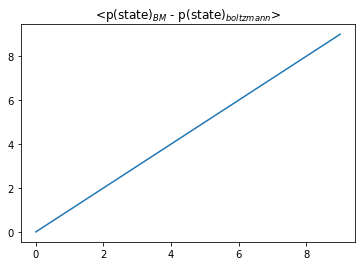

In [28]:
import matplotlib.pyplot as plt
plt.plot(iterations,distances)
plt.title('<p(state)$_{BM}$ - p(state)$_{boltzmann}$>')
plt.show()

## Derivation of the Boltzmann Distribution

Here I want to derive the fact that a Boltzmann machine creates a state $\vec{s}$ with the Boltzmann-probability (equation 1).

Remember the probability given that unit $i$ is turned on:

$$p(s_i=1)=\frac{1}{1+e^{-z_i}},$$

and that $z_i$ is the energy contribution to the state of unit $i$ when turned on against being turned off, thus

$$z_i = \Delta E_i.$$

Therefore:

$$p(s_i=1)=\frac{1}{1+e^{-\Delta E_i}}.$$

Now, imagine a Boltzmann machine with four units. We are interested in the state $\vec{s}_{1,2}$ where units 1 and 2 are on, and units 3 and 4 are off. The probability of that state is given by the product of the different units being in the required state:

$$p(\vec{s}_{1,2})=\frac{1}{1+e^{-\Delta E_1}}\cdot \frac{1}{1+e^{-\Delta E_2}} \cdot \left( 1- \frac{1}{1+e^{-\Delta E_3}}\right)\cdot \left( 1- \frac{1}{1+e^{-\Delta E_4}}\right).$$

For the next step, we use the fact that $\frac{1}{1+e^{-z_i}}=1-\frac{1}{1+e^{z_i}}$, thus:

$$p(\vec{s}_{1,2})=\left( 1- \frac{1}{1+e^{\Delta E_1}}\right)\cdot \left( 1- \frac{1}{1+e^{\Delta E_2}}\right)\cdot \frac{1}{1+e^{\Delta E_3}}\cdot \frac{1}{1+e^{\Delta E_4}}$$
$$= \frac{e^{\Delta E_1}}{1+e^{\Delta E_1}}\cdot \frac{e^{\Delta E_2}}{1+e^{\Delta E_2}}\cdot \frac{1}{1+e^{\Delta E_3}}\cdot \frac{1}{1+e^{\Delta E_4}}.$$
$$=\frac{e^{\Delta E_1 + \Delta E_2}}{\prod_{i=1}^4 (1+e^{\Delta E_i})}$$

We're almost there. Remember that, when unit i is turned on, the system's energy _decreases_ by $\Delta E_i$, thus $E=-\sum_i E_i$. To see the identity of the denominator, we substitute $e^{\Delta E_1} = a$, $e^{\Delta E_2} = b$, $e^{\Delta E_3} = c$, and $e^{\Delta E_4} = d$. Then, the denominator is:

$$(1+a)(1+b)(1+c)(1+d) = a b c d + a b c + a b d + a b + a c d + a c + a d + a + b c d + b c + b d + b + c d + c + d + 1.$$

As you can see, the result contains every possible combination of products between a, b, c, and d of length four and less. Resusbtituting the first term of that line: $abcd = e^{\Delta E_1+ \Delta E_2+\Delta E_3+\Delta E_4}$, where $\Delta E_1+ \Delta E_2+\Delta E_3+\Delta E_4$ is the negative of the energy of the system when all four units are on. Thus, the denominator is a linear combination of the negative exponentials of the energies of all the possible states of the Boltzmann machine. The probably for the state we started with thus works out to be:

$$p(\vec{s}_{1,2}) = \frac{e^{E(\vec{s}_{1,2})}}{\sum_\vec{u} e^{-E(\vec{u})}}$$

## Derivation of the Learning Rules
The learning rules can be derived as follows:

$$
\begin{align}
\langle \frac{\partial}{\partial \omega_{ij}} \ln p(\vec{v})\rangle_{data} = \langle \frac{\partial}{\partial \omega_{ij}}\left( -E(\vec{v}) -\ln \sum_{\vec{u}} e^{-E(\vec{u})} \right) \rangle_{data} \ \ \ \ \ \ (2)
\end{align}
$$
Here, we used the identity of Equation (1) above. $\langle \cdot \rangle_{data}$ stands for the expected value under the distribution of state vectors $\vec{v}$ in the data. We can thus rewrite the above equation as:

$$
\begin{align}
\sum_{\vec{v}} p_{data}(\vec{v})\left( \frac{\partial}{\partial \omega_{ij}}\left( -E(\vec{v}) -\ln \sum_{\vec{u}} e^{-E(\vec{u})} \right) \right)  \ \ \ \ \ \ (3)
\end{align}
$$
In the previous equation $p_{data}(\vec{v})$ stands for the probability of state vector $\vec{v}$ occurring in the training data and must therefore not be confused with the boltzmann distribution in equation (1) above.

For the next step we use the fact that $\frac{\partial}{\partial \omega_{ij}}E(\vec{v})=-s_is_j$. At the same time we use $\frac{\partial}{\partial \omega_{ij}} \ln \sum_{\vec{u}}e^{-E(\vec{u})} = \frac{\frac{\partial}{\partial \omega_{ij}} \sum_{\vec{u}}e^{-E(\vec{u})}}{\sum_{\vec{u}}e^{-E(\vec{u})}}$, because of $\frac{\partial}{\partial x} \ln(f(x)) = \frac{\frac{\partial}{\partial x} f(x)}{f(x)}$. Thus, equation (3) can be rewritten as:

$$
\begin{align}
\sum_{\vec{v}} p_{data}(\vec{v})(s_is_j)_\vec{v} - \sum_{\vec{v}} p_{data}(\vec{v}) \frac{\frac{\partial}{\partial \omega_{ij}} \sum_{\vec{u}}e^{-E(\vec{u})}}{\sum_{\vec{u}}e^{-E(\vec{u})}}  \ \ \ \ \ \ (4).
\end{align}
$$
Now this is starting to look a little complicated, but upon closer inspection we see that the left hand side is simply the expectation value of $s_is_j$ under the state-distribution of the data, and the right-hand side is independent of the vector $\vec{v}$ we started with. Therefore, the sum on the RHS just sums to one and equation (4) can be rewritten as (writing the derivative inside the sum):

$$
\begin{align}
\langle s_is_j \rangle_{data} - \frac{\sum_{\vec{u}} \frac{\partial}{\partial \omega_{ij}} e^{-E(\vec{u})}}{\sum_{\vec{u}}e^{-E(\vec{u})}}  \ \ \ \ \ \ (5).
\end{align}
$$
Derivation as before gives:
$$
\begin{align}
\langle s_is_j \rangle_{data} - \frac{\sum_{\vec{u}} (s_is_j)_\vec{u}\cdot e^{-E(\vec{u})}}{\sum_{\vec{u}}e^{-E(\vec{u})}}  = \langle s_is_j \rangle_{data} - \sum_\vec{u}\left( p(\vec{u})\cdot(s_is_j)_\vec{u}\right).
\end{align}
$$

In the last step we used the definition of the Boltzmann distribution from euqation (1). As the distribution describes the distribution of state vectors of the Boltzmann machine (which is the _model_), the LHS of equation resolves to:

$$\langle \frac{\partial}{\partial \omega_{ij}} \ln p(\vec{v})\rangle_{data} = \langle s_is_j \rangle_{data} - \langle s_is_j \rangle_{model}.$$

The learning rule for $b_i$ can be derived analogously.

# ToDo

- Implement learning with hidden units

- Bayesian properties?

- Notebook: Hopfield networks

- Read: Completion of incomplete data

- Notebook: compare with Kennet (2003)

- Restricted Boltzmann machines

- What does this have to do with Helmholtz machine?


# To Solve

- (On-line learning algorithms?)